#PROGETTO MACHINE LEARNING
**Dataset utilizzato per il progetto:**

**Tencnica di apprendimento del dataset**: KNN

**Realizzato da:** Lonzi Martina e Traino Sabrina

# Importazione del Dataset

Importazione del modulo datasets dalla libreria scikit-learn.

In [ ]:
from sklearn import datasets

Questa riga di codice carica il dataset delle cifre MNIST e lo assegna alla variabile datase.

In [ ]:
# importazione del dataset MNIST
dataset = datasets.load_digits()

# Suddivisione del dataset in due parti: training set e test set

Importazione della funzione train_test_split dal modulo sklearn.model_selection e della libreria numpy nominata con np.

La funzione train_test_split è utilizzata per suddividere i dataset in insiemi di training e testing in modo casuale.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

Suddivisione del dataset in training e testing

Questa riga di codice esegue una seconda suddivisione sui dati di training per creare un set di validazione:


*   *trainData e trainLabels* sono rispettivamente gli insiemi di dati e di etichette ottenuti dal primo train_test_split.
*  *test_size=0.1*  specifica che il 10% dei dati di training deve essere usato per la validazione.

*   *random_state=84*  imposta un altro seme per il generatore di numeri casuali, permettendo di ottenere risultati riproducibili.









In [ ]:

# suddivisione del dataset in training e test
# 75% per il traing e il  25% per il testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(dataset.data), dataset.target, test_size=0.25, random_state=42)



Suddivisione dei dati di training per creare un set di validazione:

Questa riga di codice esegue una seconda suddivisione sui dati di training per creare un set di validazione:

*trainData e trainLabels* sono gli insiemi di dati e etichette ottenuti dal primo train_test_split.

*test_size=0.1* specifica che il 10% dei dati di training deve essere usato per la validazione.

*random_state=84* imposta un altro seme per il generatore di numeri casuali, permettendo di ottenere risultati riproducibili.

In [ ]:
# prende il 10% del trining e lo usa per la valutazione
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

# KNN

Utilizzo del classificatore K-Nearest Neighbors (KNN) della libreria scikit-learn per addestrare e valutare un modello su un dataset.

KNN sta per K-NEAREST NEIGHBOUR è un algoritmo di clssificazione che si basa sulle caratteristiche degli oggetti vicini a quello considerato. L'algoritmo, quindi, classifica un oggetto in base alla sua vicinanza rispetto ad altri oggetti noti.

Il funzionamento dell'algoritmo KNN si basa sulla stima della distanza tra le caratteristiche dell'oggetto da classificare e quelle degli oggetti già noti al sistema. L'algoritmo KNN utilizza quindi i k oggetti più vicini  quello da classificare per determinare l sua classe.
La scelta del valore di K viene essere effettuata atraverso varie tecniche di euristica.

Importazione del classificatore KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Definizione di una gamma di valori dispari per k (da 1 a 29 con un passo di 2). k è il numero di vicini più prossimi da considerare nel classificatore KNN.

In [ ]:
kValori = range(1, 30, 2) # kVals

Inizializzazione della lista delle accuratezze, che verrà utilizzata per memorizzare le accuratezze del modello per ciascun valore di k.



In [ ]:
accuracies = []

In [ ]:
# ciclo per tutti i valori di kValori
for k in kValori:
    modello = KNeighborsClassifier(n_neighbors=k)  # Crea un'istanza del classificatore KNN con il valore corrente di k.
    modello.fit(trainData, trainLabels) # Addestra il modello utilizzando i dati di training (trainData) e le etichette di training (trainLabels).


    score = modello.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


Questo codice riguarda l’addestramento di un classificatore K-Nearest Neighbors (KNN) su un set di dati.

La funzione *.KNeighborsClassifier()* crea un’istanza del classificatore KNN con il valore corrente di k. Il parametro *n_neighbors* specifica il numero di vicini da considerare per la classificazione, mentre *.fit()* addestra il modello utilizzando i dati di training *(trainData)* e le etichette di training *(trainLabels)*.

In altre parole, il modello impara a classificare i dati in base ai vicini più prossimi.

La funzione *.score()* calcola l’accuratezza del modello utilizzando i dati di validazione *(valData)* e le etichette di validazione *(valLabels)* e quindi viene stampata l’accuratezza del modello per il valore corrente di k.


In [ ]:
from sklearn.metrics import classification_report
# massima precisione
i = np.argmax(accuracies)
print("k=%d ragginge la massima precisione di %.2f%% sui dati di validazione" % (kValori[i],
    accuracies[i] * 100))


# Ora che si sa il valore massimo di k, riaddestramento del classificatore
model = KNeighborsClassifier(n_neighbors=kValori[i])
model.fit(trainData, trainLabels)

# Predizione dell'etichetta per il test di prova
predictions = model.predict(testData)

# valutazione della perfomance del modello per ogni cifra
print("Valutazione dei dati di prova")
print(classification_report(testLabels, predictions))

k=1 ragginge la massima precisione di 99.26% sui dati di validazione
Valutazione dei dati di prova
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Matrice di confusione

La matrice di confusione è utile per valutare quanto bene il modello di machine learning ha classificato le diverse classi.

Le celle sulla diagonale principale rappresentano le previsioni corrette, mentre le altre celle rappresentano gli errori di classificazione.

Questo grafico aiuta a identificare eventuali tendenze o aree in cui il modello potrebbe migliorare.

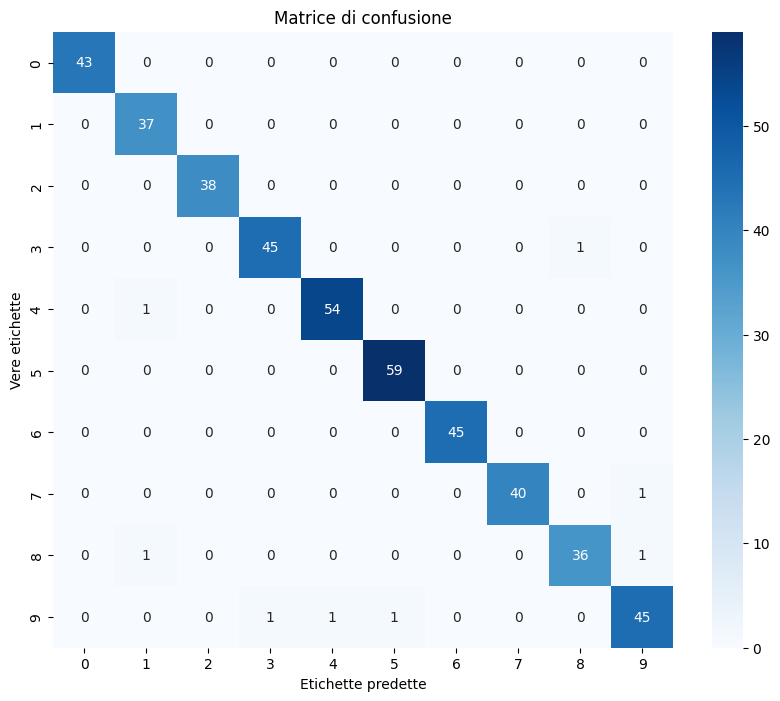

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola la matrice di valutazione
conf_matrix = confusion_matrix(testLabels, predictions)

#Ottieni etichette univoche degli assi
labels = sorted(list(set(testLabels)))

# Grafico della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Etichette predette')
plt.ylabel('Vere etichette')
plt.title('Matrice di confusione')
plt.show()

Questo codice calcola e visualizza la matrice di confusione per valutare le prestazioni di un modello di machine learning. Vediamo cosa fa passo per passo:

1.   Importazione delle librerie:
  *   from *sklearn.metrics import confusion_matrix*: Importa la funzione *confusion_matrix* da Scikit-Learn, che calcola la matrice di confusione.
  *   La libreria matplotlib serve per creare grafici.
  *   La libreria seaborn viene utilizzata per migliorare la visualizzazione del grafico.
  *   La libreria seaborn si usa per migliorare la visualizzazione del grafico.
2.   Calcolo della matrice di confusione:
  *   La funzione *.confusion_matrix()* calcola la matrice di confusione confrontando le etichette reali (testLabels) con le etichette predette (predictions).
3.   Ottenere etichette univoche degli assi:
  *  La funzione *.sorted()* crea una lista ordinata di etichette univoche presenti nei dati di test (testLabels).
4.   Creazione del grafico della matrice di confusione:
  *   La funzione *.figure()* crea una figura con dimensioni 10x8 pollici.
  *   La funzione *.heatmap()* crea una mappa di calore (heatmap) della matrice di confusione. I valori sono annotati e formattati come interi (fmt='d'). Il colore della mappa è impostato su “Blues”.
  *   La funzione *.xlabel()* etichetta l’asse x con “Etichette predette”.
  *   La funzione *.ylabel()* etichetta l’asse y con “Vere etichette”.
  *   La funzione *.title()* aggiunge un titolo al grafico.
  *   La funzione *.show()* mostra il grafico.





